In [6]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [7]:
# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [8]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

In [9]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

points3dOnCube = np.array([produce_cube_points(0., 20.),
                          produce_cube_points(5., 20.),
                          produce_cube_points(10., 20.),
                          produce_cube_points(15., 20.),
                          produce_cube_points(-5., 20.),
                          produce_cube_points(-10., 20.),
                          produce_cube_points(0., 25.),
                          produce_cube_points(5., 25.),
                          produce_cube_points(10., 25.),
                          produce_cube_points(15., 25.),
                          produce_cube_points(-5., 25.),
                          produce_cube_points(-10., 25.),
                          produce_cube_points(-15., 25.),
                          produce_cube_points(0., 30.),
                          produce_cube_points(5., 30.),
                          produce_cube_points(-5., 30.),
                          [[12.3, 1.3, 23.6],
                           [12.3, -4.7, 23.6],
                           [14.8, 1.3, 28.7],
                           [14.8, -4.7, 28.7],
                           [9.6, 1.3, 31.5],
                           [9.6, -4.7, 31.5],
                           [6.3, 1.3, 23.2],
                           [6.3, -4.7, 23.2]
                           ],
                          [[-8.4, 1.3, 29.8],
                           [-8.4, -4.7, 29.8],
                           [-3.3, 1.3, 25.3],
                           [-3.3, -4.7, 25.3],
                           [0.5, 1.3, 29.1],
                           [0.5, -4.7, 29.1],
                           [-3.9, 1.3, 32.5],
                           [-3.9, -4.7, 32.5]],
                          [[-12.8, 1.3, 24.4],
                           [-12.8, -4.7, 24.4],
                           [-6.9, 1.3, 21.7],
                           [-6.9, -4.7, 21.7],
                           [-4.4, 1.3, 27.0],
                           [-4.4, -4.7, 27.0],
                           [-10., 1.3, 29.7],
                           [-10., -4.7, 29.7]
                           ]     ])


19


points3dOnCube1:   [[ 0.   1.3 20. ]
 [ 0.  -4.7 20. ]
 [-6.  -4.7 20. ]
 [-6.   1.3 20. ]
 [ 0.   1.3 26. ]
 [ 0.  -4.7 26. ]
 [-6.  -4.7 26. ]
 [-6.   1.3 26. ]]
point_2d:   [[[657 415]]

 [[657 148]]

 [[387 146]]

 [[388 416]]

 [[657 402]]

 [[657 195]]

 [[448 194]]

 [[448 403]]]


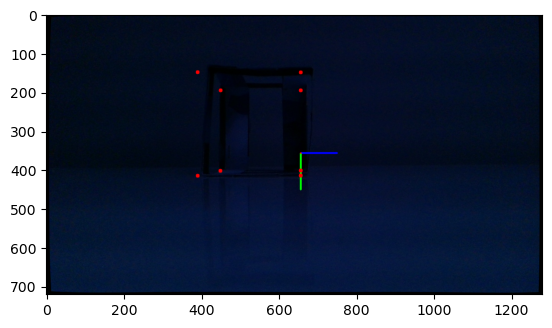

points3dOnCube1:   [[ 5.   1.3 20. ]
 [ 5.  -4.7 20. ]
 [-1.  -4.7 20. ]
 [-1.   1.3 20. ]
 [ 5.   1.3 26. ]
 [ 5.  -4.7 26. ]
 [-1.  -4.7 26. ]
 [-1.   1.3 26. ]]
point_2d:   [[[881 415]]

 [[882 147]]

 [[612 148]]

 [[613 415]]

 [[831 402]]

 [[831 194]]

 [[623 195]]

 [[623 402]]]


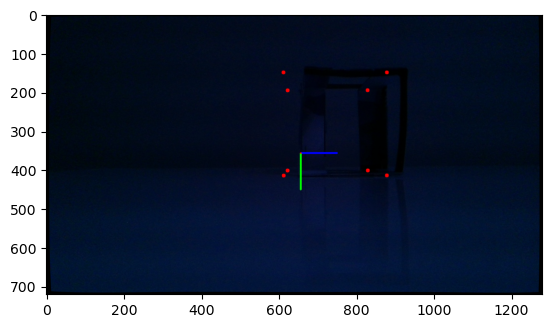

points3dOnCube1:   [[10.   1.3 20. ]
 [10.  -4.7 20. ]
 [ 4.  -4.7 20. ]
 [ 4.   1.3 20. ]
 [10.   1.3 26. ]
 [10.  -4.7 26. ]
 [ 4.  -4.7 26. ]
 [ 4.   1.3 26. ]]
point_2d:   [[[1108  416]]

 [[1108  146]]

 [[ 837  147]]

 [[ 836  415]]

 [[1007  403]]

 [[1008  193]]

 [[ 796  194]]

 [[ 796  402]]]


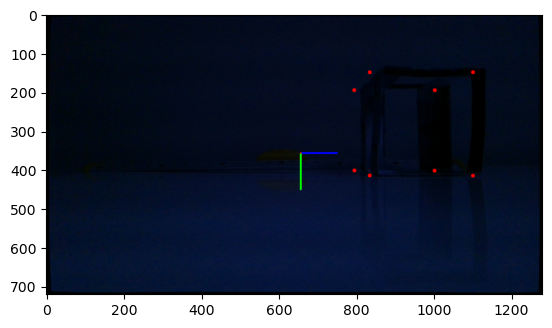

points3dOnCube1:   [[15.   1.3 20. ]
 [15.  -4.7 20. ]
 [ 9.  -4.7 20. ]
 [ 9.   1.3 20. ]
 [15.   1.3 26. ]
 [15.  -4.7 26. ]
 [ 9.  -4.7 26. ]
 [ 9.   1.3 26. ]]
point_2d:   [[[1331  415]]

 [[1332  146]]

 [[1063  146]]

 [[1063  416]]

 [[1182  403]]

 [[1182  193]]

 [[ 972  193]]

 [[ 972  403]]]


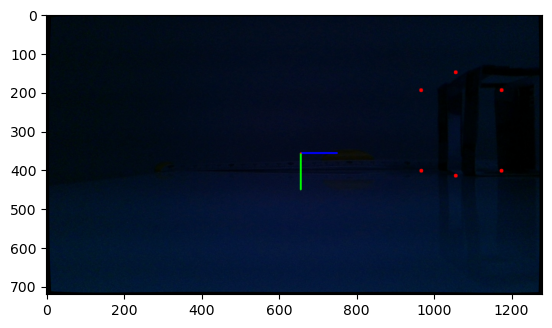

points3dOnCube1:   [[ -5.    1.3  20. ]
 [ -5.   -4.7  20. ]
 [-11.   -4.7  20. ]
 [-11.    1.3  20. ]
 [ -5.    1.3  26. ]
 [ -5.   -4.7  26. ]
 [-11.   -4.7  26. ]
 [-11.    1.3  26. ]]
point_2d:   [[[433 415]]

 [[432 146]]

 [[162 146]]

 [[161 416]]

 [[484 402]]

 [[483 194]]

 [[271 193]]

 [[271 403]]]


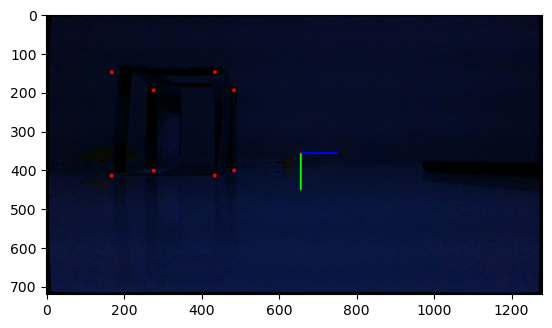

points3dOnCube1:   [[-10.    1.3  20. ]
 [-10.   -4.7  20. ]
 [-16.   -4.7  20. ]
 [-16.    1.3  20. ]
 [-10.    1.3  26. ]
 [-10.   -4.7  26. ]
 [-16.   -4.7  26. ]
 [-16.    1.3  26. ]]
point_2d:   [[[206 416]]

 [[206 146]]

 [[-69 144]]

 [[-65 416]]

 [[307 403]]

 [[306 193]]

 [[ 97 193]]

 [[ 97 403]]]


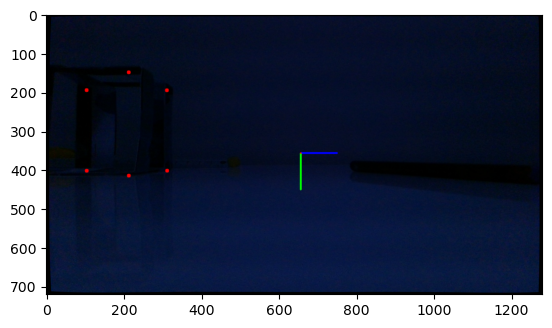

points3dOnCube1:   [[ 0.   1.3 25. ]
 [ 0.  -4.7 25. ]
 [-6.  -4.7 25. ]
 [-6.   1.3 25. ]
 [ 0.   1.3 31. ]
 [ 0.  -4.7 31. ]
 [-6.  -4.7 31. ]
 [-6.   1.3 31. ]]
point_2d:   [[[657 404]]

 [[657 188]]

 [[440 187]]

 [[440 404]]

 [[657 395]]

 [[657 220]]

 [[481 220]]

 [[481 395]]]


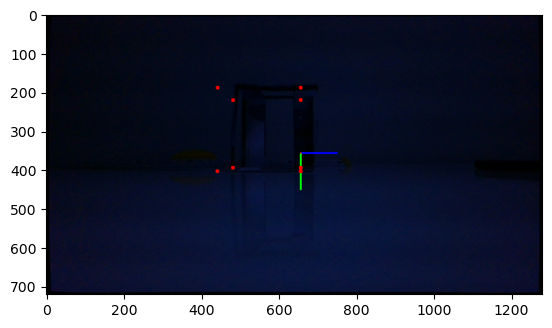

points3dOnCube1:   [[ 5.   1.3 25. ]
 [ 5.  -4.7 25. ]
 [-1.  -4.7 25. ]
 [-1.   1.3 25. ]
 [ 5.   1.3 31. ]
 [ 5.  -4.7 31. ]
 [-1.  -4.7 31. ]
 [-1.   1.3 31. ]]
point_2d:   [[[838 404]]

 [[838 188]]

 [[621 188]]

 [[621 404]]

 [[803 395]]

 [[804 220]]

 [[628 220]]

 [[628 395]]]


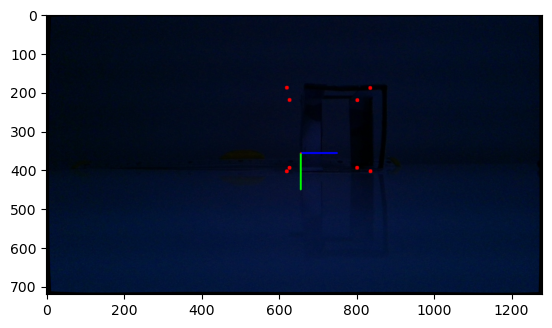

points3dOnCube1:   [[10.   1.3 25. ]
 [10.  -4.7 25. ]
 [ 4.  -4.7 25. ]
 [ 4.   1.3 25. ]
 [10.   1.3 31. ]
 [10.  -4.7 31. ]
 [ 4.  -4.7 31. ]
 [ 4.   1.3 31. ]]
point_2d:   [[[1021  405]]

 [[1021  187]]

 [[ 802  188]]

 [[ 801  404]]

 [[ 952  396]]

 [[ 952  219]]

 [[ 774  220]]

 [[ 774  395]]]


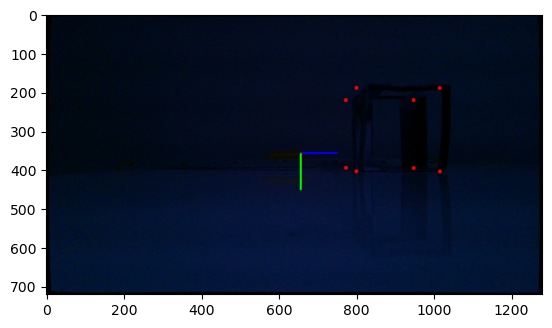

points3dOnCube1:   [[15.   1.3 25. ]
 [15.  -4.7 25. ]
 [ 9.  -4.7 25. ]
 [ 9.   1.3 25. ]
 [15.   1.3 31. ]
 [15.  -4.7 31. ]
 [ 9.  -4.7 31. ]
 [ 9.   1.3 31. ]]
point_2d:   [[[1202  404]]

 [[1202  187]]

 [[ 985  187]]

 [[ 984  405]]

 [[1101  396]]

 [[1101  219]]

 [[ 923  219]]

 [[ 922  396]]]


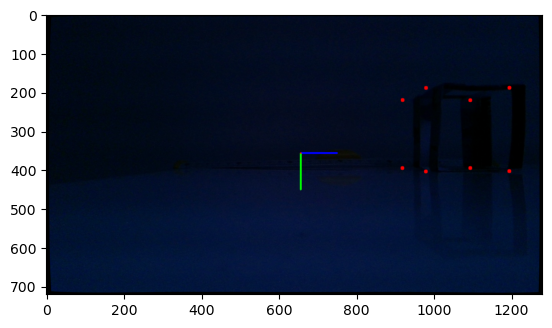

points3dOnCube1:   [[ -5.    1.3  25. ]
 [ -5.   -4.7  25. ]
 [-11.   -4.7  25. ]
 [-11.    1.3  25. ]
 [ -5.    1.3  31. ]
 [ -5.   -4.7  31. ]
 [-11.   -4.7  31. ]
 [-11.    1.3  31. ]]
point_2d:   [[[477 404]]

 [[476 188]]

 [[256 186]]

 [[256 405]]

 [[511 395]]

 [[510 220]]

 [[332 219]]

 [[332 396]]]


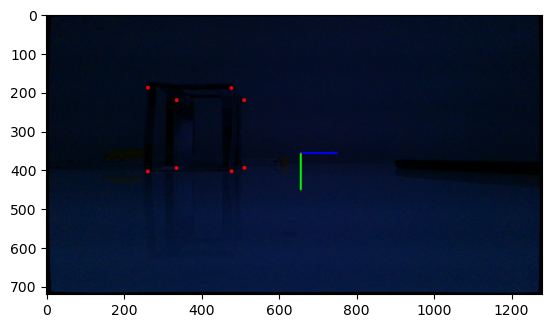

points3dOnCube1:   [[-10.    1.3  25. ]
 [-10.   -4.7  25. ]
 [-16.   -4.7  25. ]
 [-16.    1.3  25. ]
 [-10.    1.3  31. ]
 [-10.   -4.7  31. ]
 [-16.   -4.7  31. ]
 [-16.    1.3  31. ]]
point_2d:   [[[293 405]]

 [[293 186]]

 [[ 76 187]]

 [[ 76 404]]

 [[362 396]]

 [[362 219]]

 [[184 219]]

 [[184 396]]]


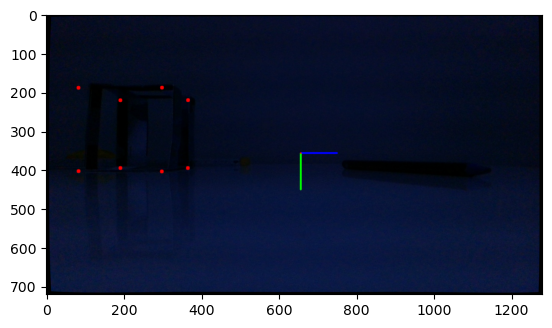

points3dOnCube1:   [[-15.    1.3  25. ]
 [-15.   -4.7  25. ]
 [-21.   -4.7  25. ]
 [-21.    1.3  25. ]
 [-15.    1.3  31. ]
 [-15.   -4.7  31. ]
 [-21.   -4.7  31. ]
 [-21.    1.3  31. ]]
point_2d:   [[[ 112  404]]

 [[ 112  187]]

 [[-119  184]]

 [[-115  405]]

 [[ 213  396]]

 [[ 213  218]]

 [[  38  219]]

 [[  38  395]]]


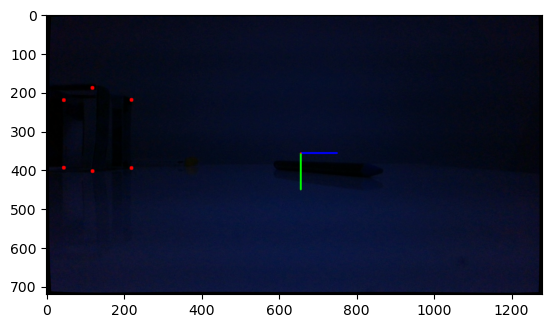

points3dOnCube1:   [[ 0.   1.3 30. ]
 [ 0.  -4.7 30. ]
 [-6.  -4.7 30. ]
 [-6.   1.3 30. ]
 [ 0.   1.3 36. ]
 [ 0.  -4.7 36. ]
 [-6.  -4.7 36. ]
 [-6.   1.3 36. ]]
point_2d:   [[[657 396]]

 [[657 216]]

 [[475 215]]

 [[476 397]]

 [[657 390]]

 [[657 239]]

 [[505 238]]

 [[505 390]]]


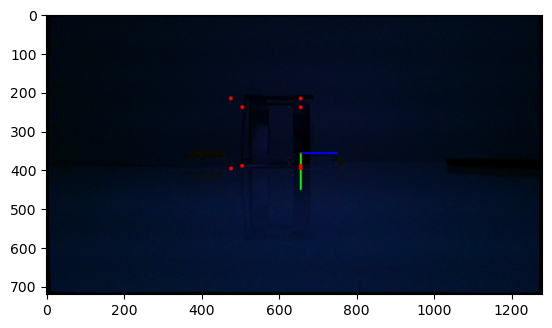

points3dOnCube1:   [[ 5.   1.3 30. ]
 [ 5.  -4.7 30. ]
 [-1.  -4.7 30. ]
 [-1.   1.3 30. ]
 [ 5.   1.3 36. ]
 [ 5.  -4.7 36. ]
 [-1.  -4.7 36. ]
 [-1.   1.3 36. ]]
point_2d:   [[[808 397]]

 [[809 215]]

 [[627 216]]

 [[627 396]]

 [[784 390]]

 [[784 239]]

 [[632 239]]

 [[632 390]]]


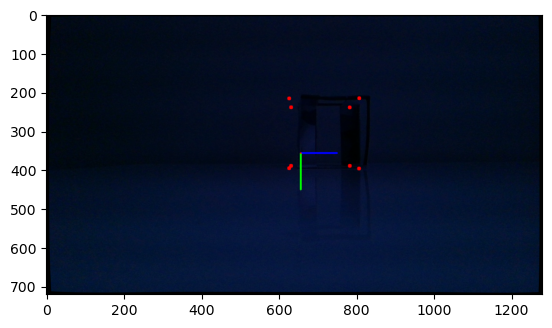

points3dOnCube1:   [[ -5.    1.3  30. ]
 [ -5.   -4.7  30. ]
 [-11.   -4.7  30. ]
 [-11.    1.3  30. ]
 [ -5.    1.3  36. ]
 [ -5.   -4.7  36. ]
 [-11.   -4.7  36. ]
 [-11.    1.3  36. ]]
point_2d:   [[[506 397]]

 [[506 215]]

 [[321 214]]

 [[322 397]]

 [[531 390]]

 [[531 239]]

 [[376 238]]

 [[377 390]]]


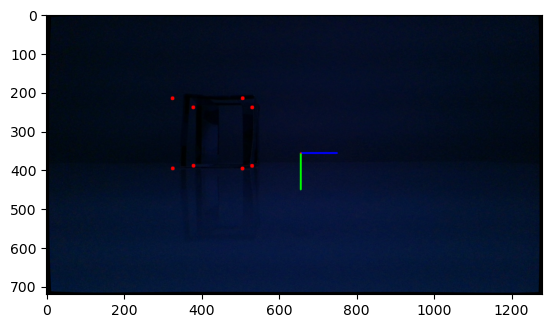

points3dOnCube1:   [[12.3  1.3 23.6]
 [12.3 -4.7 23.6]
 [14.8  1.3 28.7]
 [14.8 -4.7 28.7]
 [ 9.6  1.3 31.5]
 [ 9.6 -4.7 31.5]
 [ 6.3  1.3 23.2]
 [ 6.3 -4.7 23.2]]
point_2d:   [[[1130  407]]

 [[1130  177]]

 [[1129  399]]

 [[1129  208]]

 [[ 936  395]]

 [[ 936  221]]

 [[ 902  408]]

 [[ 903  174]]]


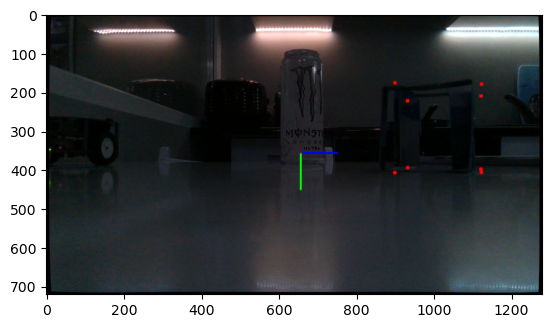

points3dOnCube1:   [[-8.4  1.3 29.8]
 [-8.4 -4.7 29.8]
 [-3.3  1.3 25.3]
 [-3.3 -4.7 25.3]
 [ 0.5  1.3 29.1]
 [ 0.5 -4.7 29.1]
 [-3.9  1.3 32.5]
 [-3.9 -4.7 32.5]]
point_2d:   [[[400 397]]

 [[400 214]]

 [[540 404]]

 [[539 190]]

 [[673 398]]

 [[673 212]]

 [[548 394]]

 [[548 226]]]


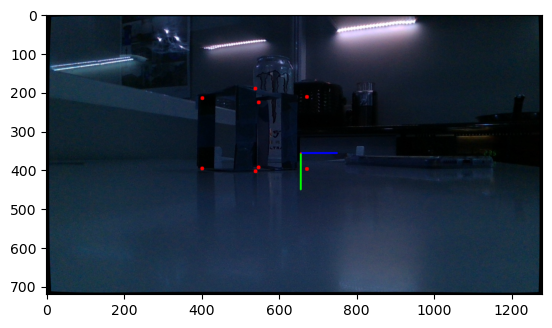

points3dOnCube1:   [[-12.8   1.3  24.4]
 [-12.8  -4.7  24.4]
 [ -6.9   1.3  21.7]
 [ -6.9  -4.7  21.7]
 [ -4.4   1.3  27. ]
 [ -4.4  -4.7  27. ]
 [-10.    1.3  29.7]
 [-10.   -4.7  29.7]]
point_2d:   [[[180 406]]

 [[180 183]]

 [[370 411]]

 [[370 162]]

 [[510 401]]

 [[510 200]]

 [[350 397]]

 [[349 213]]]


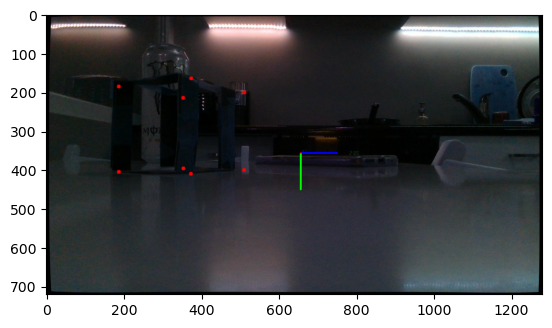

In [10]:
count = 0
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("points3dOnCube1:  ", points3dOnCube1)
        print("point_2d:  ", point_2d)
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            i += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1